# Banking Predictions with Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Data

### Dataset information
- job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? (categorical: "no","yes","unknown")
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")


**related with the last contact of the current campaign:**
- contact: contact communication type (categorical: "cellular","telephone")
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


**other attributes:**
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


**social and economic context attributes**
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


**Output variable (desired target):**
- y: has the client subscribed a term deposit? (binary: "yes","no")

In [5]:
data = pd.read_csv("bank.csv", sep=";")

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
data.shape

(4119, 21)

In [8]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## 2. Split table into test and train

In [10]:
from sklearn.model_selection import train_test_split

X = data.loc[:,data.columns!="y"]
y = data.loc[:,"y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75, 
    test_size = 0.25
)

## 3. Data cleaning

### I transform the 'yes' and 'no' columns into binary (0 or 1)

In [13]:
y_train = np.where(y_train=="yes", 1, 0)
y_test = np.where(y_test=="yes", 1, 0)

X_train["default"] = np.where(X_train["default"]=="yes", 1, 0)
X_test["default"] = np.where(X_test["default"]=="yes", 1, 0)

### I modify the education column to avoid ambiguous data when creating dummies

In [15]:
X_train["education"].unique()

array(['university.degree', 'basic.6y', 'high.school',
       'professional.course', 'basic.9y', 'basic.4y', 'unknown'],
      dtype=object)

In [16]:
X_train["education"] = X_train["education"].map(
    {
        "basic.4y": "Basic",
        "basic.6y": "Basic",
        "basic.9y": "Basic",
        "high.school": "High School",
        "high.school": "High School",
        "professional.course": "Professional Course",
        "university.degree": "University Degree",
        "illiterate": "Illiterate",
        "unknown": "Unknown"
    }
)

X_test["education"] = X_test["education"].map(
    {
        "basic.4y": "Basic",
        "basic.6y": "Basic",
        "basic.9y": "Basic",
        "high.school": "High School",
        "high.school": "High School",
        "professional.course": "Professional Course",
        "university.degree": "University Degree",
        "illiterate": "Illiterate",
        "unknown": "Unknown"
    }
)

In [17]:
X_train["education"].unique()

array(['University Degree', 'Basic', 'High School', 'Professional Course',
       'Unknown'], dtype=object)

### Conversion of categorical variables to dummies

I identify the categorical variables, which are:

["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]

In [20]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [21]:
X_train = pd.get_dummies(
    X_train, 
    columns=["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"],
    drop_first = True
)

X_test = pd.get_dummies(
    X_test, 
    columns=["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"],
    drop_first = True
)

In [22]:
X_train.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [23]:
X_test.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

I verify that they have the same columns

In [25]:
X_train.columns.size == X_test.columns.size

False

In [26]:
# I search for the column that is not in the table.
acum = []
for i in X_test.columns:
    if i not in X_train.columns:
        acum.append(i)

acum

['education_Illiterate']

In [44]:
# I remove the column from the testing table to simplify the problem.
X_test.drop('education_Illiterate', axis = "columns", inplace = True)

## 4. Feature selection for the model

In [47]:
n = 12

In [49]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression(max_iter=1000000)

In [53]:
X_train.head()

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
4087,29,0,302,1,999,0,1.1,93.994,-36.4,4.860,...,True,False,False,False,False,True,False,False,True,False
1073,47,0,51,3,999,0,-1.8,93.075,-47.1,1.405,...,False,False,False,False,True,False,False,False,True,False
1813,31,0,854,1,999,0,-3.0,92.713,-33.0,0.715,...,False,False,False,False,False,False,False,True,True,False
1449,36,0,125,2,999,1,-1.8,92.893,-46.2,1.334,...,True,False,False,False,False,False,False,True,False,False
3126,60,0,245,2,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,False,False,True,False,True,False


In [55]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [56]:
print(rfe.support_)

[False False False False False  True False False False  True False False
  True False False False False False False False False False False False
 False False False False False False False  True False False False  True
  True  True  True  True False  True False False False False False  True
  True]


In [59]:
table_columns = pd.DataFrame({
    "Column": X_train.columns, 
    "Retains": rfe.support_,
    "Position": rfe.ranking_
})
table_columns.sort_values("Position")

,Column,Retains,Position
48,poutcome_success,True,1
41,month_oct,True,1
39,month_may,True,1
38,month_mar,True,1
37,month_jun,True,1
5,previous,True,1
31,loan_unknown,True,1
36,month_jul,True,1
35,month_dec,True,1
9,euribor3m,True,1


## 5. Model creation

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train.loc[:,rfe.support_], y_train)

LogisticRegression(max_iter=10000)

## 6. Model validation

In [65]:
X_test.loc[:,rfe.support_]

,previous,euribor3m,job_entrepreneur,loan_unknown,month_dec,month_jul,month_jun,month_mar,month_may,month_oct,poutcome_nonexistent,poutcome_success
2002,0,4.962,False,False,False,True,False,False,False,False,True,False
3035,0,4.967,False,True,False,False,True,False,False,False,True,False
3061,0,4.968,False,False,False,True,False,False,False,False,True,False
1812,0,4.860,True,False,False,False,False,False,True,False,True,False
3827,0,4.964,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2122,6,1.048,False,False,False,False,False,False,False,False,False,True
2912,1,0.883,False,False,False,False,False,False,False,False,False,True
107,0,4.966,False,False,False,True,False,False,False,False,True,False
759,0,1.244,False,False,False,False,False,False,True,False,True,False


In [67]:
y_pred = logreg.predict(X_test.loc[:,rfe.support_]) # If not specified, the threshold is 0.5
y_pred_proba  = logreg.predict_proba(X_test.loc[:,rfe.support_])[:, 1] # I obtain the probability vector

## 7. Creation of the Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [72]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[917,  13],
       [ 81,  19]], dtype=int64)

In [74]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0       0         917
        1          81
1       0          13
        1          19
dtype: int64

In [76]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]

### Accuracy

In [79]:
(TN + TP) / (TN + TP + FN + FP)

0.9087378640776699

### Sensitivity

In [82]:
TP / (TP + FN)

0.19

### Specificity

In [85]:
TN / (TN + FP)

0.986021505376344

## 8. ROC Curve (Receiver Operating Characteristic Curve)

In [88]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
# The roc_curve function automatically calculates
# the values of sensitivity and 1-specificity for different thresholds
specificity_inv, sensitivity, threshold = roc_curve(y_test, y_pred_proba)

In [92]:
# I verify that for a threshold close to 0.5, the values are similar to the ones calculated
print(f"Threshold = {threshold[11]}")
print(f"Sensitivity = {sensitivity[11]}")
print(f"Specificity = {1-specificity_inv[11]}")

Threshold = 0.6031627538433644
Sensitivity = 0.15
Specificity = 0.9924731182795699


In [94]:
import seaborn as sns

<Axes: >

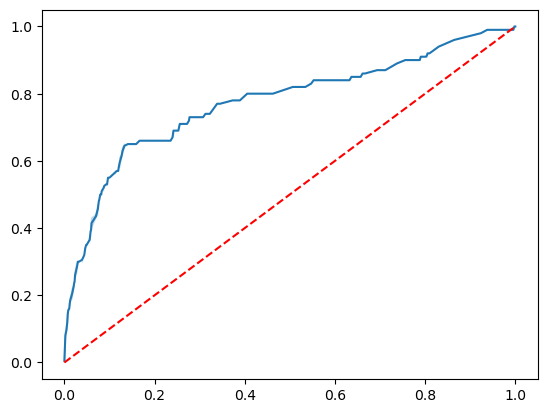

In [96]:
line_x = [i * 0.01 for i in range(101)]
line_y = line_x
sns.lineplot(x = specificity_inv, y = sensitivity)
sns.lineplot(x = line_x, y = line_y, ls = "--", c = "r")

### I calculate the area under the curve

In [99]:
roc_auc_score(y_test, y_pred_proba)

0.7751344086021507